# Sravani Kondapalli - TASK 2

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data

In [2]:
iris=pd.read_csv('Iris.csv')

### Understand data

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.shape

(150, 6)

### Statisticsl summary

In [6]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### Inspecting data

In [7]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(iris)

,Data Type,No of Levels,Levels
Id,int64,150,[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
SepalLengthCm,float64,35,[5.1 4.9 4.7 4.6 5.0 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,[3.5 3.0 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.0 4.4 3...
PetalLengthCm,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.0 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.0 1...
Species,object,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


### Checking for duplicates

In [8]:
iris.duplicated().sum()

0

### Checking for null values

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

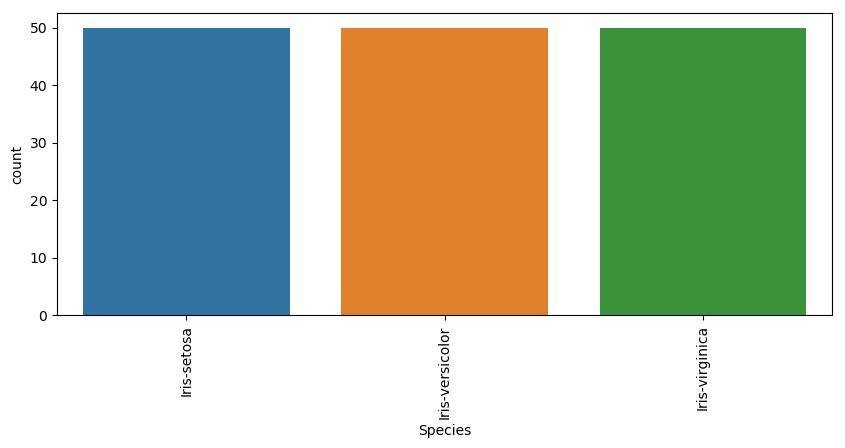

In [10]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(iris['Species'])
plt.xticks(rotation=90)
plt.show()

The three  different species of flowers are in same ratio

In [11]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le_1 = LabelEncoder()
for col in iris.select_dtypes('object').columns:
    iris[col] = le_1.fit_transform(iris[[col]])

C:\Users\sravani kondapalli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [14]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

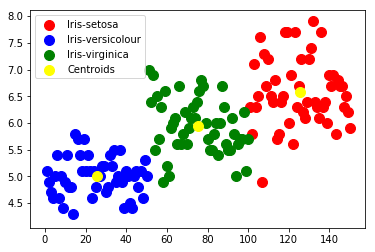

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()